In [58]:
import scipy,pprint
from pprint import pprint
import numpy as np
import pandas as pd
import math,datetime
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_classif

In [59]:
raw_train_x=pd.read_csv("train_x.csv",encoding="big5")
raw_train_x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,30000,1,2,2,26,1,-1,-1,2,0,...,30642,29361,29022,28409,28924,4000,0,1000,900,800
1,80000,2,3,2,40,2,2,0,0,0,...,75945,61740,29089,28267,4,3716,2000,1000,1000,2000
2,50000,2,2,1,53,0,0,0,0,0,...,30356,31342,32644,32719,1500,1600,1498,2627,1400,1200
3,110000,2,1,2,27,0,0,0,0,2,...,85362,74552,59902,42254,4113,3500,4005,0,1500,1999
4,200000,2,2,1,47,0,0,0,0,0,...,158980,157837,127528,119550,9058,7260,7367,4303,4551,4411


# train explore

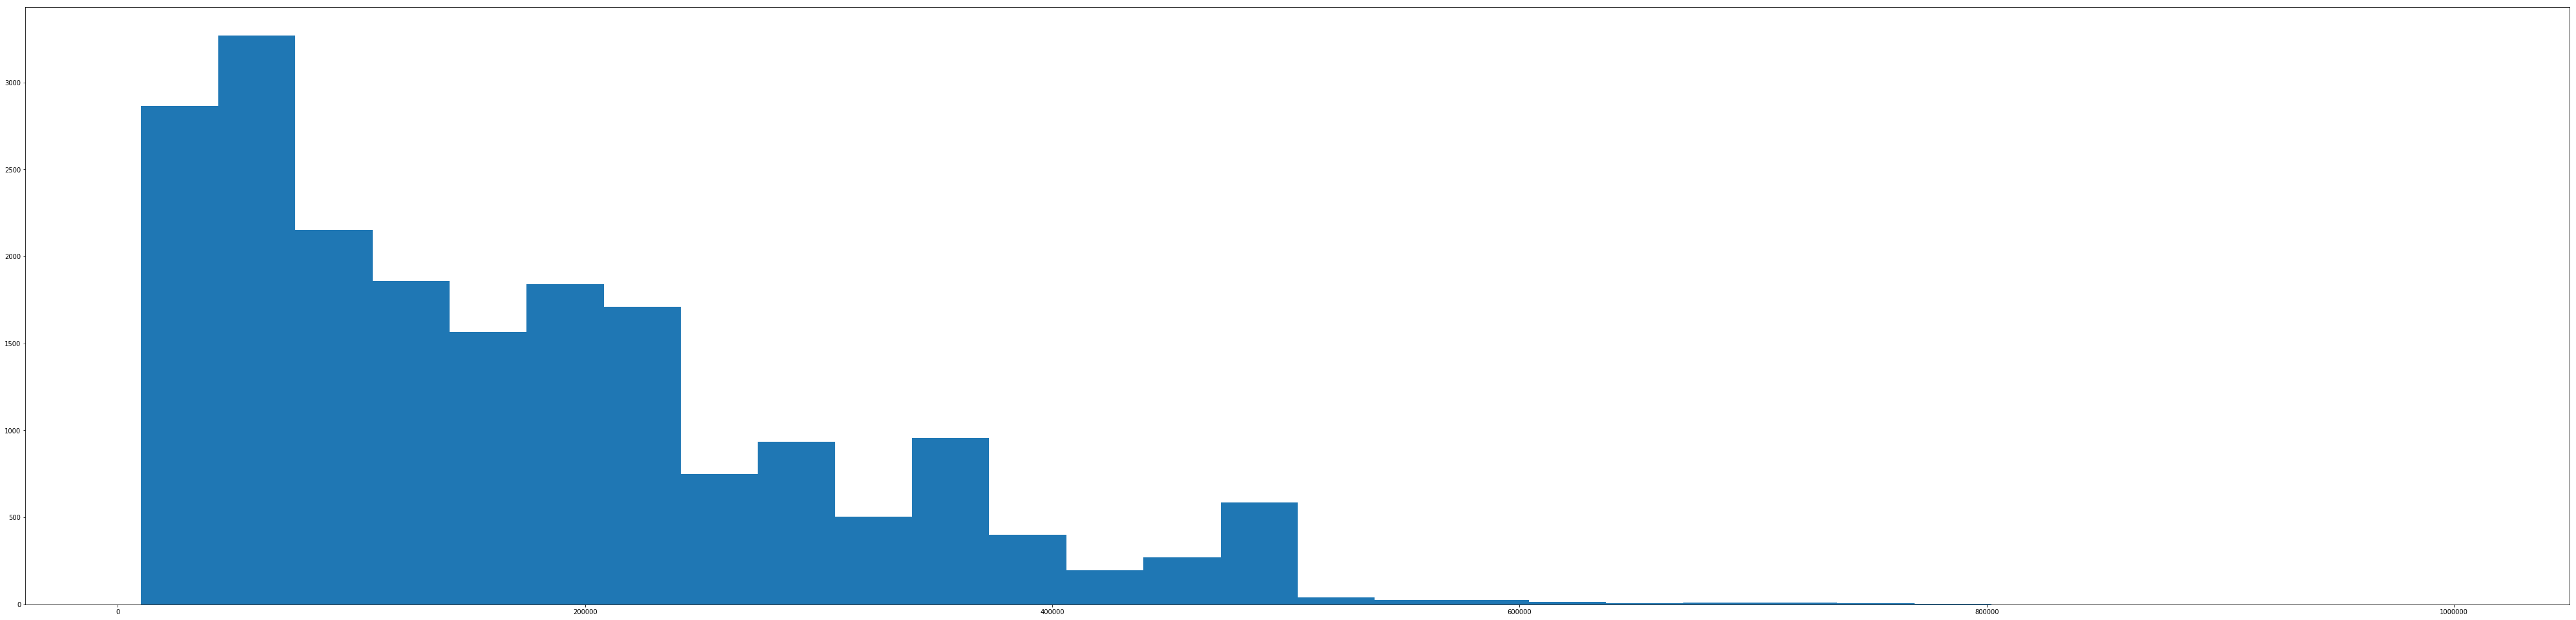

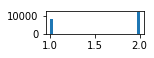

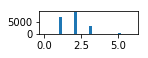

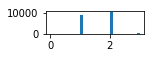

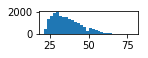

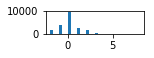

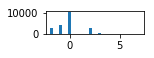

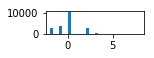

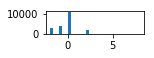

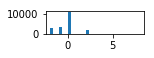

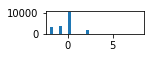

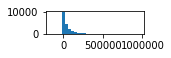

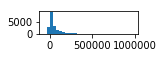

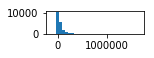

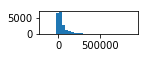

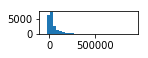

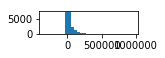

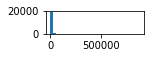

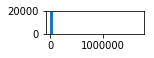

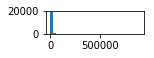

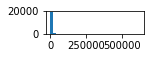

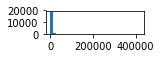

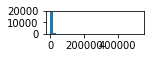

In [41]:
plt.figure(figsize=(240,160))
for i in range(raw_train_x.shape[1]):
    plt.subplot(8,3,i+1)
    plt.hist(raw_train_x.iloc[:,i],bins=30)
    plt.show()

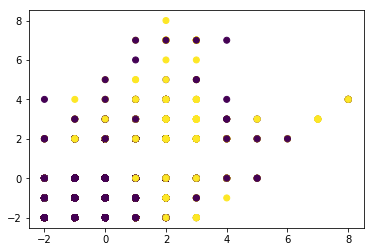

In [8]:
train_column_pay=raw_train_x.iloc[:,5:10]
plt.scatter(train_column_pay['PAY_0'],train_column_pay['PAY_5'],c=np.array(raw_train_y).reshape((1,-1))[0])


In [9]:
from math import *
a=[1,2,3,4,5,6,7,8]
[i for i in a if i>5]

new_
for i in a:
    if i>5:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-9-387f26bd07a4>, line 8)

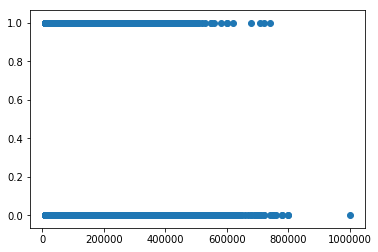

In [10]:
plt.scatter(raw_train_x.LIMIT_BAL,raw_train_y)

# def prework of X

In [62]:
def prework_x(raw_x):
    new_x=raw_x
    new_x['MARRIAGE']=new_x['MARRIAGE'].replace(2,0)
    new_x['SEX']=new_x['SEX'].replace(2,0)
    new_x=new_x.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis=1)
    return(new_x)

In [63]:
train_x=prework_x(raw_train_x)

In [64]:
raw_train_y=pd.read_csv("train_y.csv",encoding="big5")
# raw_train_y.head(10)
train_y=raw_train_y

In [65]:
raw_test_x=pd.read_csv("test_x.csv",encoding="big5")

In [66]:
test_x=prework_x(raw_test_x)

# def function

In [83]:
from sklearn.metrics import log_loss
def sigmoid(x):
    return (1 / (1 + math.exp(-x)))
class Logistic_Regression_gradient():
    def __init__(self):
        pass
    def parameter_init(self, dim,w_init=None,b_init=None):
#         self.W = w_init.reshape(dim,1)
        if b_init:
            self.W = w_init
    #         self.b = b_init[0]
            self.b = b_init
        else:
            self.W = np.zeros((dim, 1))        
            self.b = 0
    def feature_scaling(self, X, train=False):    
        if train:
            self.min = np.min(X, axis=0)
            self.max = np.max(X, axis=0)
        return (X - self.min) / (self.max - self.min)
    
    def z_feature_scaling(self,X,train=False):
        if train:
            self.mean=np.mean(X,axis=0)
            self.std=np.std(X,axis=0)
        return((X-self.mean)/self.std)
        
    def predict(self, X): 
        z=np.dot(X, self.W) + self.b
        # define vectorized sigmoid
        sigmoid_v = np.vectorize(sigmoid)

#         # test
#         scores = np.array([ -0.54761371,  17.04850603,   4.86054302])
#         print sigmoid_v(scores)
        out=sigmoid_v(z)
        return (out)
        
    def RMSELoss(self, X, Y):
        return np.sqrt(np.mean((Y - self.predict(X))** 2) )
    
    def cross_entropy(self,X,Y):
        pred=self.predict(X)
#         pred=[[i,1-i] for i in pred]
        return(log_loss(Y,pred))
    
    def train(self, X, Y,w_init=None,b_init=None ,epochs=30000, lr=0.01 ,feature_scaling="feature_scaling"): 
        
        batch_size = X.shape[0]
        W_dim = X.shape[1]
        self.parameter_init(W_dim,w_init=w_init,b_init=b_init)
        
        if feature_scaling=="z_feature_scaling":
            X = self.z_feature_scaling(X, train=True)
        else:
            X = self.feature_scaling(X, train=True)

            
        lr_b = 0
        lr_W = np.zeros((W_dim, 1))


        for epoch in range(epochs):
            if not epoch%1000:
                print(epoch,self.cross_entropy(X,Y))
            # mse loss
            grad_b = -np.sum(Y - self.predict(X))/ batch_size
            grad_W = -np.dot(X.T, (Y - self.predict(X))) / batch_size
            
            # adagrad
            lr_b += grad_b ** 2
            lr_W += grad_W ** 2
            
            #update
            self.b = self.b - lr / np.sqrt(lr_b) * grad_b
            self.W = self.W - lr / np.sqrt(lr_W) * grad_W


# prepare to train final test

In [74]:
train_x=np.array(train_x)
train_y=np.array(train_y)
train_y=train_y.reshape(-1,)
print(train_x.shape,train_y.shape)

(20000, 17) (20000,)


In [75]:
test_x=np.array(test_x)
print(test_x.shape)

(10000, 17)


In [76]:
selecter = SelectKBest(score_func=f_classif, k=15)
selected_train_x = selecter.fit_transform(train_x, train_y)
selected_test_x=selecter.transform(test_x)
print(selected_train_x.shape,selected_test_x.shape)
selecter.get_support()

(20000, 15) (10000, 15)


array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [77]:
train_y=train_y.reshape(-1,1)

In [94]:
lr=Logistic_Regression_gradient()
lr.train(selected_train_x,train_y,w_init=last_w,b_init=last_b,epochs=200000,feature_scaling="feature_scaling")

0 0.46631706655249766
1000 0.46631706640460335
2000 0.4663170663881292
3000 0.46631706638805354
4000 0.4663170663880531
5000 0.4663170663880531
6000 0.4663170663880531
7000 0.4663170663880531
8000 0.4663170663880531
9000 0.4663170663880531
10000 0.4663170663880531
11000 0.4663170663880531
12000 0.4663170663880531
13000 0.4663170663880531
14000 0.4663170663880531
15000 0.4663170663880531
16000 0.4663170663880531
17000 0.4663170663880531
18000 0.4663170663880531
19000 0.4663170663880531
20000 0.4663170663880531
21000 0.4663170663880531
22000 0.4663170663880531
23000 0.4663170663880531
24000 0.4663170663880531
25000 0.4663170663880531
26000 0.4663170663880531
27000 0.4663170663880531
28000 0.4663170663880531
29000 0.4663170663880531
30000 0.4663170663880531
31000 0.4663170663880531
32000 0.4663170663880531
33000 0.4663170663880531
34000 0.4663170663880531
35000 0.4663170663880531
36000 0.4663170663880531
37000 0.4663170663880531
38000 0.4663170663880531
39000 0.4663170663880531
40000 0.46

In [95]:
last_w=lr.W
last_b=lr.b

In [96]:
scaled_selected_test_x=lr.feature_scaling(selected_test_x)

In [97]:
yhat=lr.predict(scaled_selected_test_x)
answer=np.round(yhat).reshape(1,-1)[0]
answer

array([0., 1., 0., ..., 0., 0., 0.])

In [98]:
id_index=pd.Index(["id_"+str(i) for i in range(len(raw_test_x))])
out_df=pd.DataFrame({"Value":answer.astype(int)},index=id_index)
out_df.to_csv("result"+str(datetime.date.today())+".csv",index_label="id")